In [1]:
import sys
sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')
import cv2

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
lec=np.load('lec.npy')

start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))
vec_obs=lec

In [4]:
lec=np.load('lec.npy')

start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))
vec_obs=lec

In [5]:
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=[['x','y']]


In [6]:
CORDS.describe()

,x,y
count,721.000000,7.210000e+02
mean,-0.424601,1.968067e+00
std,4.046287,2.209345e+00
min,-6.577478,-1.889495e+00
25%,-3.702920,4.025757e-16
50%,0.000000,2.032811e+00
75%,1.786825,4.520524e+00
max,6.589452,4.923400e+00


In [7]:
(CORDS.x.max()-CORDS.x.min())*10

x    131.669303
dtype: float64

In [8]:
def redo_lec_img(lec_img):
    lec_img = np.zeros((150,150,3), np.uint8)
    for cords in CORDS.values:
        aux=cords*10
        #print(aux)
        #print (np.floor(aux[0]+65) , np.floor(25 - aux[1]))
        lec_img[int(25 - aux[1]),int(aux[0]+65) ]=255
    return(lec_img)

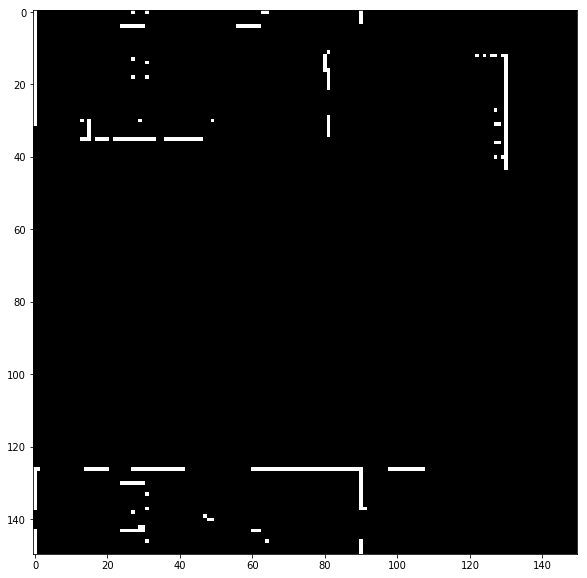

In [9]:
lec_img = np.zeros((150,150,3), np.uint8)
for cords in CORDS.values:
    aux=cords*10
    #print(aux)
    #print (np.floor(aux[0]+65) , np.floor(25 - aux[1]))
    lec_img[int(25 - aux[1]),int(aux[0]+65) ]=255
fig = plt.figure(figsize=(10,10))

plt.imshow(lec_img)

In [10]:
kernel=np.ones((3,3))
dilation = cv2.dilate(lec_img,kernel,iterations = 1)
kernel=np.ones((1,1))

eroded= cv2.erode(lec_img,kernel,iterations=1)

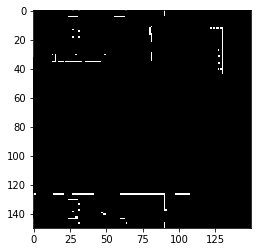

In [11]:
plt.imshow(eroded)

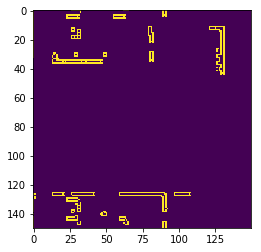

In [12]:
#edges = cv2.Canny(dilation,5,15,apertureSize = 7)
edges = cv2.Canny(lec_img,1,10,apertureSize = 7)

plt.imshow(edges)
lines = cv2.HoughLines(edges,.5,np.pi/180,20)


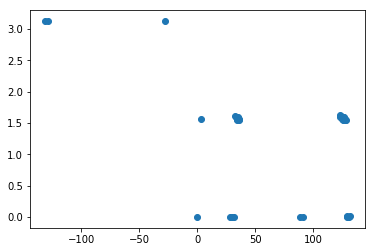

In [13]:
lines.shape

LINES=pd.DataFrame(lines[:,0])
plt.scatter(x=LINES[0], y=LINES[1])

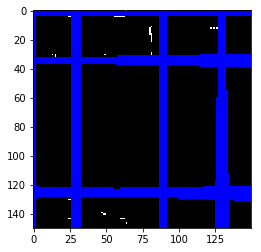

In [14]:
for line in lines:
    rho,theta = line.T
    
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(lec_img,(x1,y1),(x2,y2),(0,0,255),2)



plt.imshow(lec_img)


In [15]:

minLineLength = 100
maxLineGap = 3

In [16]:
lines = cv2.HoughLinesP(edges,1,np.pi/180,25,minLineLength,maxLineGap)

In [17]:
type(lines)

numpy.ndarray

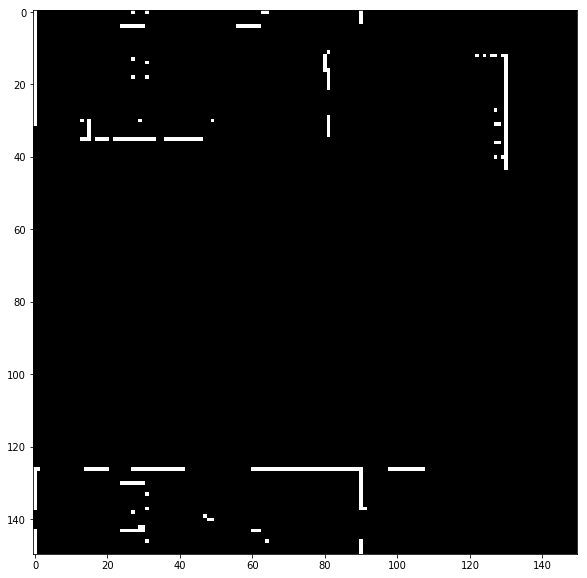

In [18]:
lec_img=redo_lec_img(lec_img)
fig = plt.figure(figsize=(10,10))

plt.imshow(lec_img)


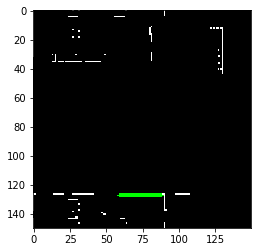

In [19]:
for x1,y1,x2,y2 in lines[0]:
    cv2.line(lec_img,(x1,y1),(x2,y2),(0,255,0),2)
plt.imshow(lec_img)


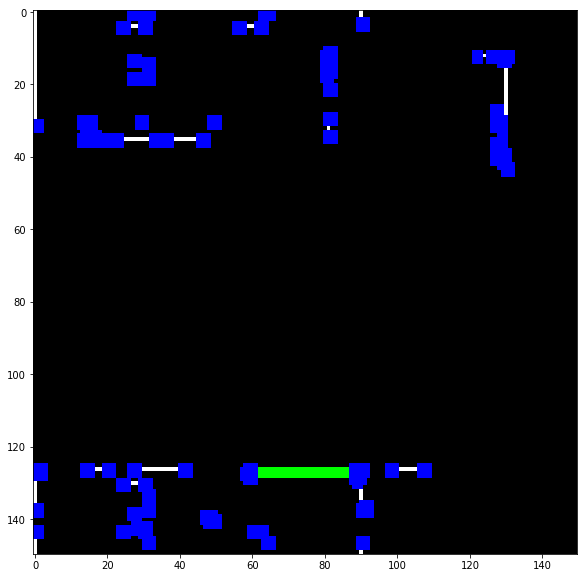

In [20]:
img=lec_img
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,1,0.004)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
fig = plt.figure(figsize=(10,10))
plt.imshow(img)
lec_img= redo_lec_img(lec_img)

In [21]:
dst.shape

(150, 150)

In [22]:
import random as rng

In [24]:
cam = cv2.VideoCapture(0)
while True:
    # Read each frame in video stream
    ret, frame = cam.read()
    # Display each frame in video stream
    #gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    #corners=cv2.goodFeaturesToTrack(gray,100,.01,10)
    
    radius = 4
    #for i in range(corners.shape[0]):
        #cv2.circle(gray, (corners[i,0,0], corners[i,0,1]), radius, (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256)), cv2.FILLED)
    cv2.imshow("Capture", frame)
    if not ret:
        break
# Monitor keystrokes
    k = cv2.waitKey(1)

    if k & 0xFF == ord('q'):
        # q key pressed so quit
        print("Quitting...")
        cv2.destroyAllWindows()
        break
    elif k & 0xFF == ord('c'):
        # c key pressed so capture frame to image file
        cap_name = "capture_{}.png".format(cap_cnt)
        cv2.imwrite(cap_name, frame)
        print("Saving {}!".format(cap_name))
        # Increment Capture Counter for next frame to capture
        cap_cnt += 1
cam.release()
print('Released')

Quitting...
Released


In [ ]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.goodFeaturesToTrack(gray,100,.01,10)

In [ ]:
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
